<a href="https://colab.research.google.com/github/TaufikHidayat-312010286/TUGAS-UAS-DATA-SCIENCE-/blob/main/UAS_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=4aeeba9e5663605d7022f167820e656896b2551295a509126f98e70bbd4a4be4
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
!pip install findspark

Prediksi saham algoritma Linear Reggresion

In [ ]:
# Import library yang diperlukan
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Imputer

In [ ]:
# Inisialisasi Spark Session
spark = SparkSession.builder.appName("SahamPrediction").getOrCreate()


In [ ]:
# Mengganti "your_dataset.csv" dengan nama dataset yang sesuai
data = spark.read.csv("TLKM.JK.csv", header=True, inferSchema=True)
df.show()

+----------+-----------+-----------+-----------+-----------+-----------+---------+
|      Date|       Open|       High|        Low|      Close|  Adj Close|   Volume|
+----------+-----------+-----------+-----------+-----------+-----------+---------+
|2019-01-01|3750.000000|3750.000000|3750.000000|3750.000000|3102.091309|        0|
|2019-01-02|3750.000000|3760.000000|3700.000000|3730.000000|3085.546631| 31355300|
|2019-01-03|3710.000000|3770.000000|3690.000000|3740.000000|3093.819092| 83842400|
|2019-01-04|3690.000000|3740.000000|3690.000000|3710.000000|3069.002197| 73936900|
|2019-01-07|3760.000000|3790.000000|3750.000000|3770.000000|3118.635742| 83678100|
|2019-01-08|3770.000000|3800.000000|3750.000000|3800.000000|3143.452393| 67963700|
|2019-01-09|3820.000000|3830.000000|3730.000000|3730.000000|3085.546631| 98529400|
|2019-01-10|3760.000000|3800.000000|3740.000000|3800.000000|3143.452393|126396700|
|2019-01-11|3820.000000|3860.000000|3800.000000|3860.000000|3193.085938|116753700|
|201

In [ ]:
# Definisikan schema kolom-kolom dengan tipe data yang sesuai
schema = StructType([
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Adj Close", FloatType(), True),
    StructField("Volume", DoubleType(), True),
    # Tambahkan kolom lain sesuai kebutuhan dan jenis datanya
])

In [ ]:
# Menampilkan skema DataFrame
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
# Menghapus baris yang memiliki nilai null di kolom-kolom tertentu
df_cleaned = df.na.drop(subset=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [ ]:
# Konversi tipe data string ke double
for col_name in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df_cleaned = df_cleaned.withColumn(col_name, col(col_name).cast(DoubleType()))


In [ ]:
# Inisialisasi Imputer
imputer = Imputer(strategy='mean', inputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], outputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [ ]:
# Fit dan transform data
imputer_model = imputer.fit(df_cleaned)
df_cleaned = imputer_model.transform(df_cleaned)

In [ ]:
# Memilih fitur yang akan digunakan untuk prediksi (misalnya: 'Open', 'High', 'Low', 'Volume')
feature_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Membuat assembler untuk menggabungkan fitur-fitur menjadi satu kolom "features"
assembler = VectorAssembler(inputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], outputCol='features', handleInvalid='keep')

# Transformasi data menggunakan VectorAssembler
data = assembler.transform(df_cleaned)

In [ ]:
# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
train_data, test_data = data.randomSplit([0.8, 0.2])

In [ ]:
# Inisialisasi model LinearRegression
dt = LinearRegression(featuresCol='features', labelCol='Close')

# Melatih model LinearRegression
dt_model = dt.fit(train_data)

In [ ]:
# Inisialisasi model LinearRegression
rf = LinearRegression(featuresCol='features', labelCol='Close')

# Melatih model LinearRegression
rf_model = rf.fit(train_data)

In [ ]:
# Menguji model
predictions = model.transform(test_data)

In [ ]:
# Menampilkan hasil prediksi
predictions.select("Date", "features", "label", "prediction").show()

+----------+--------------------+---------+------------------+
|      Date|            features|    label|        prediction|
+----------+--------------------+---------+------------------+
|2019-01-03|[3710.0,3770.0,36...| 3093.819|  3094.14571803847|
|2019-01-09|[3820.0,3830.0,37...|3085.5466|3085.8717856414246|
|2019-01-17|[3970.0,3990.0,39...| 3300.625|3301.0243826017804|
|2019-01-18|[4010.0,4020.0,39...| 3325.442| 3325.831143491819|
|2019-01-25|[3880.0,3930.0,38...|3209.6304|3209.9784347320574|
|2019-02-01|[3910.0,3930.0,38...| 3201.358| 3201.696877340695|
|2019-02-11|[3870.0,3940.0,38...|3250.9915|3251.3552185405824|
|2019-02-12|[3900.0,3910.0,38...| 3159.997|3160.3289508290054|
|2019-02-15|[3770.0,3800.0,37...|3135.1802|3135.5100867789733|
|2019-02-18|[3830.0,3920.0,38...| 3226.175|3226.5271035598516|
|2019-02-19|[3930.0,3940.0,39...|3242.7195|3243.1023335536593|
|2019-02-22|[3870.0,3870.0,38...|3176.5415| 3176.893999597038|
|2019-02-26|[3920.0,3930.0,38...|3250.9915|3251.3524943

In [ ]:
# Evaluasi model
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Model Accuracy: {:.2%}".format(accuracy))

Model Accuracy: 23.67%


In [ ]:
# Evaluasi performa model LinearRegression pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='rmse')
rf_rmse = rf_evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (LinearRegression):", rf_rmse)

Root Mean Squared Error (LinearRegression): 7.924761663479602e-12


In [ ]:
# Evaluasi performa model LinearRegression pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mse')
rf_mse = rf_evaluator.evaluate(rf_predictions)
print("mse Squared Error (LinearRegression):", rf_mse)

mse Squared Error (LinearRegression): 6.280184742295598e-23


In [ ]:
# Evaluasi performa model LinearRegression pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mae')
rf_mae = rf_evaluator.evaluate(rf_predictions)
print("mae Absolute Error (LinearRegression):", rf_mae)

mae Absolute Error (LinearRegression): 6.497411102456338e-12


In [ ]:
from pyspark.sql.functions import col

# Evaluasi performa model LinearRegression pada data pengujian
dt_predictions = dt_model.transform(test_data)

# Menghitung deviasi antara prediksi dan harga saham aktual
dt_predictions = dt_predictions.withColumn("Deviation", (col("prediction") - col("Close")) / col("Close"))

# Menghitung akurasi relatif dalam bentuk persentase
accuracy_percentage = (1 - dt_predictions.select("Deviation").agg({"Deviation": "mean"}).collect()[0][0]) * 100
print(f"Akurasi Relatif Model LinearRegression: {accuracy_percentage:.2f}%")


Akurasi Relatif Model LinearRegression: 100.00%


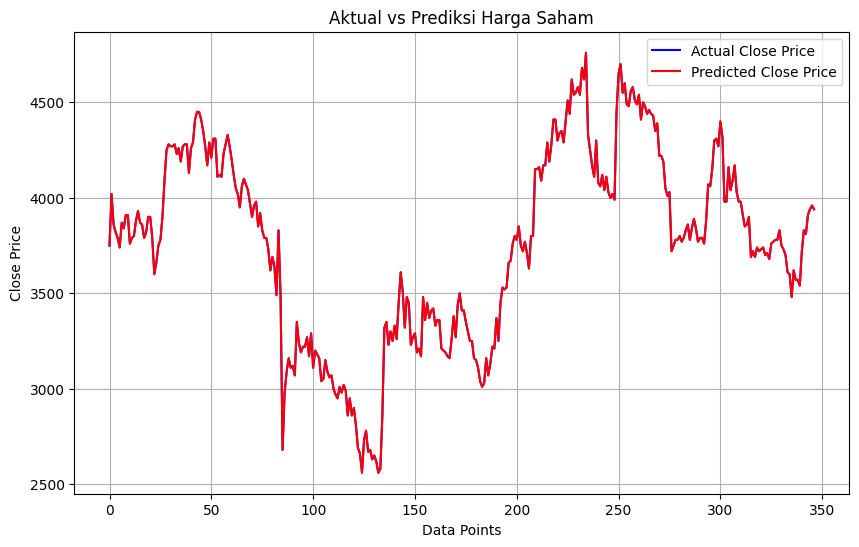

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi hasil prediksi menjadi DataFrame Pandas
dt_pred_pd = dt_predictions.select("Close", "prediction").toPandas()

# Mengurutkan berdasarkan tanggal jika diperlukan
# dt_pred_pd.sort_values(by='Date', inplace=True)

# Plot harga saham aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(dt_pred_pd['Close'], label='Actual Close Price', color='blue')
plt.plot(dt_pred_pd['prediction'], label='Predicted Close Price', color='red')

plt.title('Aktual vs Prediksi Harga Saham')
plt.xlabel('Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Metode ALgoritma SVM

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.types import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import lag, when
from pyspark.sql.window import Window
from pyspark.sql.functions import when

In [ ]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("SahamPrediction").getOrCreate()


In [ ]:
# Membaca data dari file CSV atau sumber data lainnya
df = spark.read.csv("TLKM.JK.csv", header=True, inferSchema=True)
df.show()

+----------+-----------+-----------+-----------+-----------+-----------+---------+
|      Date|       Open|       High|        Low|      Close|  Adj Close|   Volume|
+----------+-----------+-----------+-----------+-----------+-----------+---------+
|2019-01-01|3750.000000|3750.000000|3750.000000|3750.000000|3102.091309|        0|
|2019-01-02|3750.000000|3760.000000|3700.000000|3730.000000|3085.546631| 31355300|
|2019-01-03|3710.000000|3770.000000|3690.000000|3740.000000|3093.819092| 83842400|
|2019-01-04|3690.000000|3740.000000|3690.000000|3710.000000|3069.002197| 73936900|
|2019-01-07|3760.000000|3790.000000|3750.000000|3770.000000|3118.635742| 83678100|
|2019-01-08|3770.000000|3800.000000|3750.000000|3800.000000|3143.452393| 67963700|
|2019-01-09|3820.000000|3830.000000|3730.000000|3730.000000|3085.546631| 98529400|
|2019-01-10|3760.000000|3800.000000|3740.000000|3800.000000|3143.452393|126396700|
|2019-01-11|3820.000000|3860.000000|3800.000000|3860.000000|3193.085938|116753700|
|201

In [ ]:
# Definisikan schema kolom-kolom dengan tipe data yang sesuai
schema = StructType([
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Adj Close", FloatType(), True),
    StructField("Volume", DoubleType(), True),
    # Tambahkan kolom lain sesuai kebutuhan dan jenis datanya
])

In [ ]:
# Menampilkan skema DataFrame
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
# Menghapus baris yang memiliki nilai null di kolom-kolom tertentu
df_cleaned = df.na.drop(subset=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [ ]:
# Konversi tipe data string ke double
for col_name in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df_cleaned = df_cleaned.withColumn(col_name, col(col_name).cast(DoubleType()))


In [ ]:
# Inisialisasi Imputer
imputer = Imputer(strategy='mean', inputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], outputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [ ]:
# Fit dan transform data
imputer_model = imputer.fit(df_cleaned)
df_cleaned = imputer_model.transform(df_cleaned)

In [ ]:
# Menghapus kolom yang sudah ada
data = data.drop("features")

In [ ]:
# Menyiapkan kolom fitur
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = vector_assembler.transform(data)

In [ ]:
# Menambahkan kolom label
data = data.withColumn("label", when(data["Close"] > lag("Close").over(Window.orderBy("Date")), 1).otherwise(0))


In [ ]:
# Memilih kolom label dan fitur
data = data.select("features", "label")

In [ ]:
# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
train_data, test_data = data.randomSplit([0.8, 0.2])

In [ ]:
# Membuat model SVM
svm = LinearSVC(maxIter=10, regParam=0.1)
pipeline = Pipeline(stages=[svm])

In [ ]:
# Inisialisasi model SVM
svm = LinearSVC(featuresCol='features', labelCol='Close')

# Latih model pada data pelatihan
svm_model = pipeline.fit(train_data)

In [ ]:
# Melakukan prediksi pada data pengujian menggunakan model SVM (gantilah 'svm_model' dengan nama model SVM yang sebenarnya)
# Lakukan prediksi pada data pengujian
data_predictions = svm_model.transform(test_data)

In [ ]:
# Hitung RMSE
data_evaluator = RegressionEvaluator(labelCol='label', metricName='rmse')
data_rmse = data_evaluator.evaluate(data_predictions)

print("Root Mean Squared Error (SVM):", data_rmse)

Root Mean Squared Error (SVM): 0.6555724833295524


In [ ]:
# Menghitung MSE
mse_evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='mse')
mse = mse_evaluator.evaluate(predictions)

# Menampilkan hasil
print("MSE:", mse)

MSE: 0.42977528089887634


In [ ]:
# Menghitung MAE
mae_evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='mae')
mae = mae_evaluator.evaluate(predictions)

# Menampilkan hasil
print("MAE:", mse)

MAE: 0.42977528089887634


In [ ]:
# Menghitung R-squared
rsquared_evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='r2')
rsquared = rsquared_evaluator.evaluate(predictions)

# Menampilkan hasil
print("R-squared:", rsquared)

R-squared: -0.7482908040442944


In [ ]:
# Menghitung akurasi relatif
correct_predictions = predictions.filter(predictions.label == predictions.prediction).count()
total_predictions = predictions.count()
accuracy = correct_predictions / total_predictions

print("Akurasi Relatif:", accuracy)

Akurasi Relatif: 0.5702247191011236


In [ ]:
# Mengukur akurasi
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8070480549199085


In [ ]:
# Mengukur akurasi
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8070480549199085


In [ ]:
# Evaluasi model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
accuracy = evaluator.evaluate(predictions)
print("Model Accuracy: {:.2%}".format(accuracy))

Model Accuracy: 80.70%


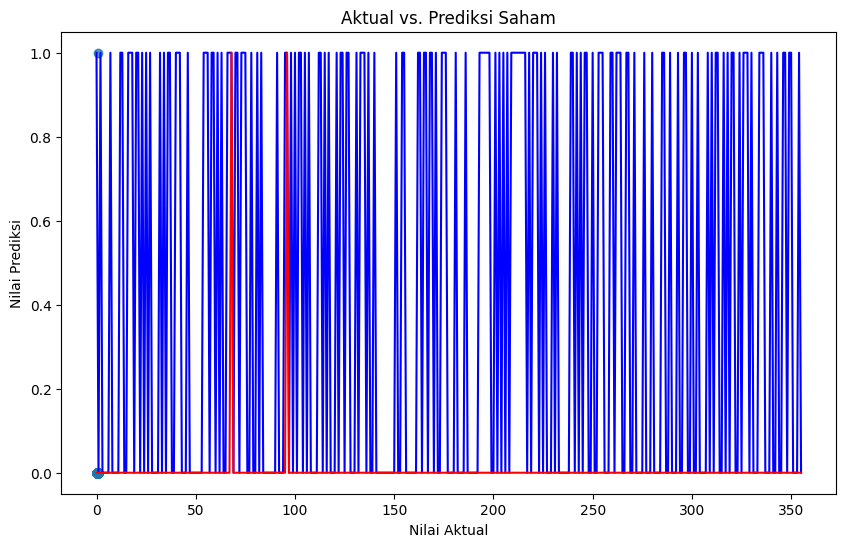

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Mengonversi DataFrame PySpark ke Pandas DataFrame
predictions_pd = predictions.select("label", "prediction").toPandas()

# Mengurutkan berdasarkan tanggal jika diperlukan
# dt_pred_pd.sort_values(by='Date', inplace=True)

# Menampilkan grafik aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.plot(predictions_pd['label'], label='Actual Close Price', color='blue')
plt.plot(predictions_pd['prediction'], label='Predicted Close Price', color='red')


plt.scatter(predictions_pd['label'], predictions_pd['prediction'], alpha=0.5)
plt.title('Aktual vs. Prediksi Saham')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

Metode Algoritma Decision Tree dan Rando Forest

In [ ]:
# Import library yang diperlukan
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Imputer

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder.appName('SahamPrediction').getOrCreate()

In [ ]:
# Membaca data dari file CSV atau sumber data lainnya
df = spark.read.csv("TLKM.JK.csv", header=True, inferSchema=True)
df.show()

+----------+-----------+-----------+-----------+-----------+-----------+---------+
|      Date|       Open|       High|        Low|      Close|  Adj Close|   Volume|
+----------+-----------+-----------+-----------+-----------+-----------+---------+
|2019-01-01|3750.000000|3750.000000|3750.000000|3750.000000|3102.091309|        0|
|2019-01-02|3750.000000|3760.000000|3700.000000|3730.000000|3085.546631| 31355300|
|2019-01-03|3710.000000|3770.000000|3690.000000|3740.000000|3093.819092| 83842400|
|2019-01-04|3690.000000|3740.000000|3690.000000|3710.000000|3069.002197| 73936900|
|2019-01-07|3760.000000|3790.000000|3750.000000|3770.000000|3118.635742| 83678100|
|2019-01-08|3770.000000|3800.000000|3750.000000|3800.000000|3143.452393| 67963700|
|2019-01-09|3820.000000|3830.000000|3730.000000|3730.000000|3085.546631| 98529400|
|2019-01-10|3760.000000|3800.000000|3740.000000|3800.000000|3143.452393|126396700|
|2019-01-11|3820.000000|3860.000000|3800.000000|3860.000000|3193.085938|116753700|
|201

In [ ]:
# Definisikan schema kolom-kolom dengan tipe data yang sesuai
schema = StructType([
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Adj Close", FloatType(), True),
    StructField("Volume", DoubleType(), True),
    # Tambahkan kolom lain sesuai kebutuhan dan jenis datanya
])

In [ ]:
# Menampilkan skema DataFrame
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
# Menghapus baris yang memiliki nilai null di kolom-kolom tertentu
df_cleaned = df.na.drop(subset=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [ ]:
# Konversi tipe data string ke double
for col_name in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df_cleaned = df_cleaned.withColumn(col_name, col(col_name).cast(DoubleType()))


In [ ]:
# Inisialisasi Imputer
imputer = Imputer(strategy='mean', inputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], outputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [ ]:
# Fit dan transform data
imputer_model = imputer.fit(df_cleaned)
df_cleaned = imputer_model.transform(df_cleaned)

In [ ]:
# Memilih fitur yang akan digunakan untuk prediksi (misalnya: 'Open', 'High', 'Low', 'Volume')
feature_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Membuat assembler untuk menggabungkan fitur-fitur menjadi satu kolom "features"
assembler = VectorAssembler(inputCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], outputCol='features', handleInvalid='keep')

# Transformasi data menggunakan VectorAssembler
data = assembler.transform(df_cleaned)

In [ ]:
# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
train_data, test_data = data.randomSplit([0.8, 0.2])

In [ ]:
# Inisialisasi model Decision Tree
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Close')

# Melatih model Decision Tree
dt_model = dt.fit(train_data)

In [ ]:
# Inisialisasi model Random Forest
rf = RandomForestRegressor(featuresCol='features', labelCol='Close')

# Melatih model Random Forest
rf_model = rf.fit(train_data)

In [ ]:
# Evaluasi performa model Decision Tree pada data pengujian
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(labelCol='Close', metricName='rmse')
dt_rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (Decision Tree):", dt_rmse)

Root Mean Squared Error (Decision Tree): 30.004877552936833


In [ ]:
# Evaluasi performa model Random Forest pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='rmse')
rf_rmse = rf_evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (Random Forest):", rf_rmse)

Root Mean Squared Error (Random Forest): 27.71929917914333


In [ ]:
# Evaluasi performa model Decision Tree pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mse')
rf_mse = rf_evaluator.evaluate(rf_predictions)
print("mse Squared Error (Decision Tree):", rf_mse)

mse Squared Error (Decision Tree): 768.359546982856


In [ ]:
# Evaluasi performa model Decision Tree pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mse')
rf_mse = rf_evaluator.evaluate(rf_predictions)
print("mse Squared Error (Random Forest):", rf_mse)

mse Squared Error (Random Forest): 768.359546982856


In [ ]:
# Evaluasi performa model LinearRegression pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mae')
rf_mae = rf_evaluator.evaluate(rf_predictions)
print("mae Absolute Error (Decision Tree):", rf_mae)

mae Absolute Error (Decision Tree): 19.42891319847204


In [ ]:
# Evaluasi performa model Random Forest pada data pengujian
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='Close', metricName='mae')
rf_mae = rf_evaluator.evaluate(rf_predictions)
print("mae Absolute Error (Random Forest):", rf_mae)

mae Absolute Error (Random Forest): 19.42891319847204


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Melakukan prediksi dengan model yang telah dilatih sebelumnya (misalnya model rf_model)
predictions = rf_model.transform(test_data)

# Membuat evaluator untuk R-squared
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="r2")

# Menghitung R-squared
r2 = evaluator.evaluate(predictions)
print("R-squared:", r2)


R-squared: 0.9952586522968059


In [ ]:
from pyspark.sql.functions import col

# Evaluasi performa model Decision Tree pada data pengujian
dt_predictions = dt_model.transform(test_data)

# Menghitung deviasi antara prediksi dan harga saham aktual
dt_predictions = dt_predictions.withColumn("Deviation", (col("prediction") - col("Close")) / col("Close"))

# Menghitung akurasi relatif dalam bentuk persentase
accuracy_percentage = (1 - dt_predictions.select("Deviation").agg({"Deviation": "mean"}).collect()[0][0]) * 100
print(f"Akurasi Relatif Model Decision Tree: {accuracy_percentage:.2f}%")


Akurasi Relatif Model Decision Tree: 99.98%


In [ ]:
# Evaluasi model Decision Tree
dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print("Decision Tree Model Accuracy: {:.2%}".format(dt_accuracy))

Decision Tree Model Accuracy: 87.67%


In [ ]:
# Evaluasi model Random Forest
rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
print("Random Forest Model Accuracy: {:.2%}".format(rf_accuracy))

Random Forest Model Accuracy: 93.84%


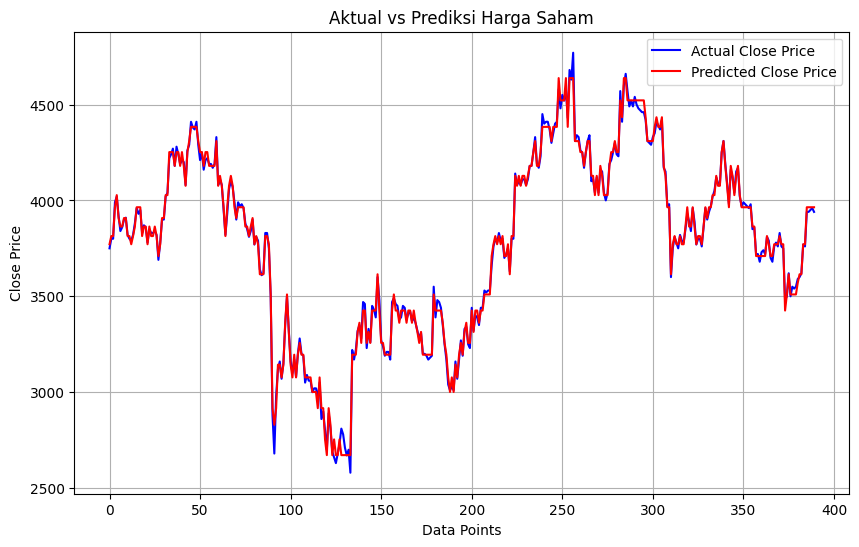

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi hasil prediksi menjadi DataFrame Pandas
dt_pred_pd = dt_predictions.select("Close", "prediction").toPandas()

# Mengurutkan berdasarkan tanggal jika diperlukan
# dt_pred_pd.sort_values(by='Date', inplace=True)

# Plot harga saham aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(dt_pred_pd['Close'], label='Actual Close Price', color='blue')
plt.plot(dt_pred_pd['prediction'], label='Predicted Close Price', color='red')

plt.title('Aktual vs Prediksi Harga Saham')
plt.xlabel('Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()